In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_list = os.listdir('C:/Users/sumit/OneDrive/Desktop/New folder/dfs/train')
print(train_list[0:5])
print(train_list[-6:-1])

['Copy-of-anold-chiari-malformation-16e_aug_0_png_jpg.rf.e5ef5df762e26214f18a8d61c7b3ce6f.jpg', 'Copy-of-anold-chiari-malformation-16e_aug_0_png_jpg.rf.f4bf94f882bf04eba5cf2d5594109541.jpg', 'Copy-of-anold-chiari-malformation-16e_aug_1_png_jpg.rf.938d24f01d59459a936032d382003a07.jpg', 'Copy-of-anold-chiari-malformation-16e_aug_2_png_jpg.rf.996e57f2a39f661c37648cfe6b21bacc.jpg', 'Copy-of-anold-chiari-malformation-16e_aug_3_png_jpg.rf.18e1473c3d7efa5f538359296a88e096.jpg']
['Patient00739_Plane3_1_of_3_png_jpg.rf.32c0d2383eb81899e4d3446ba1197f18.jpg', 'Patient00739_Plane3_1_of_3_png_jpg.rf.f7afdc632079b992804d456849e10ad5.jpg', 'Patient00739_Plane3_2_of_3_png_jpg.rf.71185b71c3ab6aa850f4d537d8c14c46.jpg', 'Patient00739_Plane3_3_of_3_png_jpg.rf.beceab5f818fc20cda6f89a5f3030f55.jpg', 'Patient00740_Plane3_2_of_3_png_jpg.rf.dcf9461862d8710390b57cd40ab0cfc4.jpg']


In [3]:
csv_path = 'C:/Users/sumit/OneDrive/Desktop/New folder/dfs/_classes.csv'
df = pd.read_csv(csv_path)
df.head()

,filename,anold-chiari-malformation,arachnoid-cyst,cerebellah-hypoplasia,colphocephaly,encephalocele,holoprosencephaly,hydracenphaly,intracranial-hemorrdge,intracranial-tumor,m-magna,mild-ventriculomegaly,moderate-ventriculomegaly,normal,polencephaly,severe-ventriculomegaly,vein-of-galen
0,Copy-of-arachnoid-cyst-37b_aug_0_png_jpg.rf.3e...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Patient00709_Plane3_1_of_3_aug_1_png_jpg.rf.3d...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Copy-of-mild-ventriculomegaly-24a_aug_4_png_jp...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Copy-of-mild-ventriculomegaly-23c_aug_3_png_jp...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Patient00709_Plane3_2_of_3_aug_4_png_jpg.rf.3e...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Warning: Unable to read image at {image_path}")
        return None
    image = cv2.resize(image, (128, 128))
    image = image / 255.0  # Normalize the image
    return image

In [5]:
df.columns

Index(['filename', ' anold-chiari-malformation', ' arachnoid-cyst',
       ' cerebellah-hypoplasia', ' colphocephaly', ' encephalocele',
       ' holoprosencephaly', ' hydracenphaly', ' intracranial-hemorrdge',
       ' intracranial-tumor', ' m-magna', ' mild-ventriculomegaly',
       ' moderate-ventriculomegaly', ' normal', ' polencephaly',
       ' severe-ventriculomegaly', ' vein-of-galen'],
      dtype='object')

In [6]:
filename_col = 'filename'
label_cols = df.columns[1:]
label_cols

Index([' anold-chiari-malformation', ' arachnoid-cyst',
       ' cerebellah-hypoplasia', ' colphocephaly', ' encephalocele',
       ' holoprosencephaly', ' hydracenphaly', ' intracranial-hemorrdge',
       ' intracranial-tumor', ' m-magna', ' mild-ventriculomegaly',
       ' moderate-ventriculomegaly', ' normal', ' polencephaly',
       ' severe-ventriculomegaly', ' vein-of-galen'],
      dtype='object')

In [7]:
images = []
labels = []

image_dir = 'C:/Users/sumit/OneDrive/Desktop/New folder/dfs/train'

for index, row in df.iterrows():
    image_path = os.path.join(image_dir, row[filename_col].strip())
    label_index = row[label_cols].values.argmax() + 1  # Identify the label index (1 to 16)
    image = load_and_preprocess_image(image_path)
    if image is not None:
        images.append(image)
        labels.append(label_index)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Debug: Print number of images and labels loaded
print(f"Loaded {len(images)} images with {len(labels)} labels.")

if len(images) == 0:
    raise ValueError("No images found. Please check the directory path and ensure there are images in the directory.")


Loaded 1418 images with 1418 labels.


In [8]:
images[:5]

array([[[0.14117647, 0.14117647, 0.13333333, ..., 0.12941176,
         0.1254902 , 0.1254902 ],
        [0.14117647, 0.14117647, 0.13333333, ..., 0.12941176,
         0.1254902 , 0.1254902 ],
        [0.14117647, 0.14117647, 0.1372549 , ..., 0.12941176,
         0.12941176, 0.12941176],
        ...,
        [0.14901961, 0.14901961, 0.14901961, ..., 0.13333333,
         0.12941176, 0.12941176],
        [0.14901961, 0.14901961, 0.14901961, ..., 0.13333333,
         0.13333333, 0.13333333],
        [0.14901961, 0.14901961, 0.14901961, ..., 0.13333333,
         0.13333333, 0.13333333]],

       [[0.00784314, 0.00784314, 0.00784314, ..., 0.00784314,
         0.00784314, 0.00784314],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.01176471, 0.01176471, 0.01176471, ..., 0.01176471,
         0.01176471, 0.01176471],
        [0.0

In [9]:
labels[:5]

array([ 2, 13, 11, 11, 13], dtype=int64)

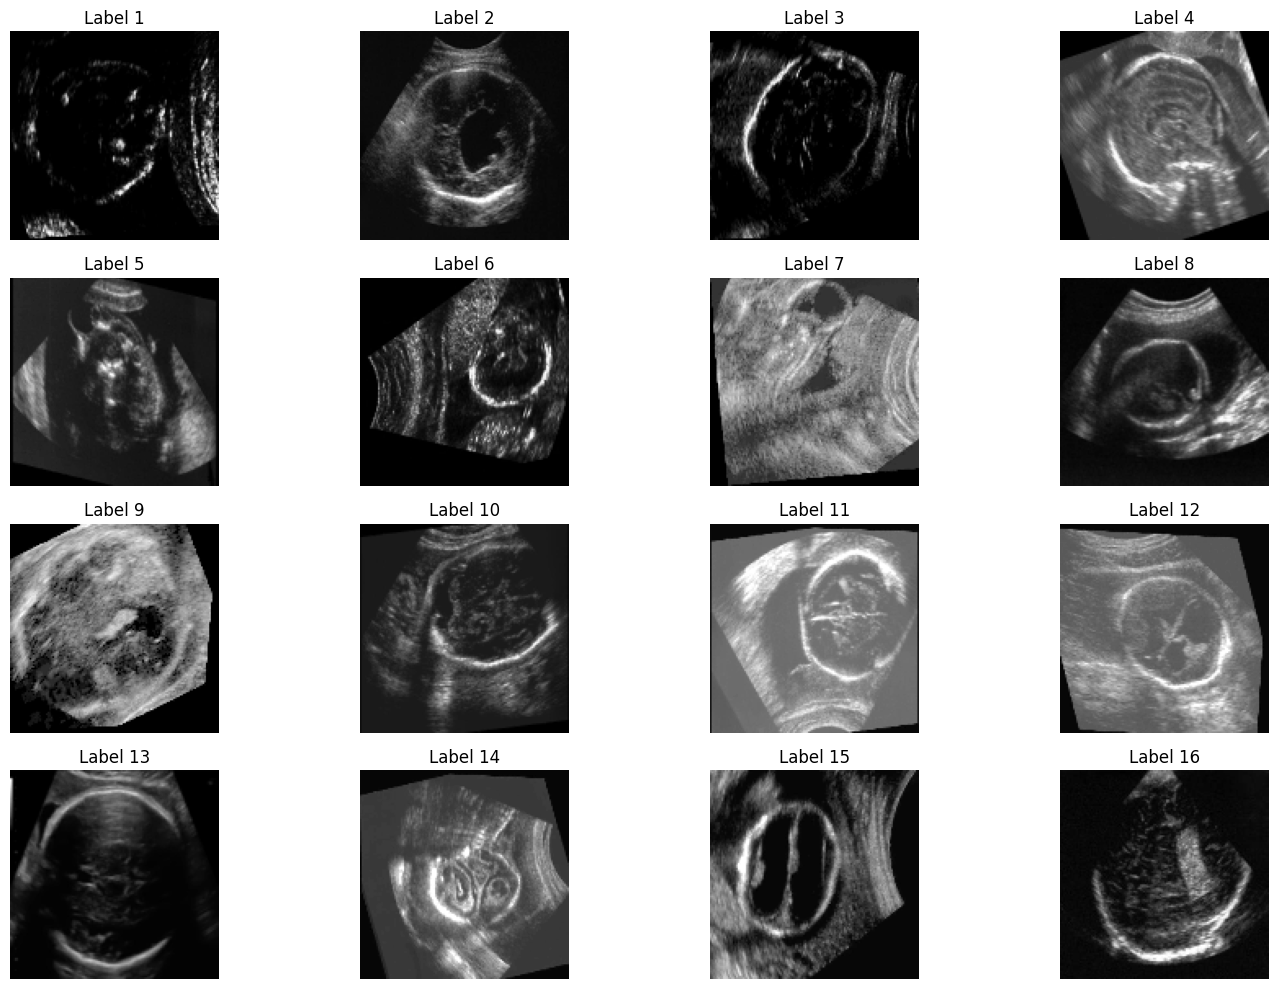

In [10]:
label_images = {}

# Load images and labels based on CSV mapping
for index, row in df.iterrows():
    image_path = os.path.join(image_dir, row[filename_col].strip())
    label_index = row[label_cols].values.argmax() + 1  # Identify the label index (1 to 16)
    image = load_and_preprocess_image(image_path)
    if image is not None and label_index not in label_images:
        label_images[label_index] = image

# Plot one image for each label
num_labels = len(label_images)
plt.figure(figsize=(15, 10))

for label, image in label_images.items():
    plt.subplot(4, 4, label)  # Create a subplot for each image (assuming 16 labels, 4x4 grid)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
# Expand dimensions of images to match the input shape for the model (assuming grayscale images)
images = np.expand_dims(images, axis=-1)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation with moderate parameters
train_datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()  # No augmentation for validation data

# Create data generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Define a simpler CNN model with moderate complexity
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(17, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model with early stopping based on validation loss
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    validation_data=val_generator,
    validation_steps=len(X_val) // 32,
    epochs=20,
    callbacks=[early_stopping]
)

C:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 17)                  │           2,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,937 (28.21 MB)

 Trainable params: 7,393,937 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


C:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 286ms/step - accuracy: 0.1373 - loss: 2.7079 - val_accuracy: 0.2422 - val_loss: 2.3599
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1562 - loss: 2.5436 - val_accuracy: 0.1786 - val_loss: 2.4812
Epoch 3/20


C:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 257ms/step - accuracy: 0.2303 - loss: 2.3711 - val_accuracy: 0.2930 - val_loss: 2.2437
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2188 - loss: 2.2288 - val_accuracy: 0.2857 - val_loss: 2.4552
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 420ms/step - accuracy: 0.2235 - loss: 2.3334 - val_accuracy: 0.2969 - val_loss: 2.2374
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2188 - loss: 2.2527 - val_accuracy: 0.4286 - val_loss: 1.9714
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 259ms/step - accuracy: 0.2687 - loss: 2.2134 - val_accuracy: 0.3633 - val_loss: 2.1540
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2500 - loss: 2.1479 - val_accuracy: 0.2857 - val_loss: 2.1189
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step - accuracy: 0.2921 - loss: 2.1784 - val_accuracy: 0.3828 - val_loss: 2.0771


In [12]:
val_loss, val_accuracy = model.evaluate(val_generator)

print(f'Validation Accuracy: {val_accuracy:.2f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.3007 - loss: 2.2535
Validation Accuracy: 0.32
